In [9]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# plt.rcParams['font.family'] = 'NanumGothic'

In [10]:
#1.0연도별_전국_전기차_누적_등록대수(전국 지역, 10~23)

conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 연도별_전국_전기차_누적_등록대수"


seoul1_tmp= pd.read_sql_query(sql,conn)


conn.close()

#1.1

seoul1 = seoul1_tmp.astype(dtype={'년월':'int', '서울':'int', '부산':'int', '대구':'int', '인천':'int', '광주':'int', '대전':'int', '울산':'int',
                                       '세종':'int', '경기':'int', '강원':'int','충북':'int', '충남':'int', '전북':'int', '전남':'int', '경북':'int',
                                       '경남':'int', '제주':'int'},
                        errors='raise',
                        copy=True)
seoul1.info()

#1.2

seoul1 = seoul1.loc[0:5,:]
seoul1.set_index('년월', inplace=True)
seoul1


#1.3 총 합계
seoul1.loc[:,'총합'] = seoul1.loc[:,'서울':'제주'].sum(axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년월      14 non-null     int64
 1   서울      14 non-null     int64
 2   부산      14 non-null     int64
 3   대구      14 non-null     int64
 4   인천      14 non-null     int64
 5   광주      14 non-null     int64
 6   대전      14 non-null     int64
 7   울산      14 non-null     int64
 8   세종      14 non-null     int64
 9   경기      14 non-null     int64
 10  강원      14 non-null     int64
 11  충북      14 non-null     int64
 12  충남      14 non-null     int64
 13  전북      14 non-null     int64
 14  전남      14 non-null     int64
 15  경북      14 non-null     int64
 16  경남      14 non-null     int64
 17  제주      14 non-null     int64
dtypes: int64(18)
memory usage: 2.1 KB


/tmp/ipykernel_34085/2616702247.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seoul1_tmp= pd.read_sql_query(sql,conn)


In [11]:
#2.0 연도별_전기차_충전소_누적(17~23년)

conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 연도별_전기차_충전소_누적"


seoul2_tmp = pd.read_sql_query(sql,conn)


conn.close()
#charging_station=pd.read_csv("../data/charging_station.csv",encoding='cp949')

#2.1

seoul2 = seoul2_tmp.astype(dtype={'년월':'int', '충전소':'int', '급속':'int', '완속':'int'},
                        errors='raise',
                        copy=True)
seoul2.info()
seoul2


seoul2 = seoul2.iloc[0:-1,:2]
seoul2

seoul2 =seoul2.set_index('년월')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년월      7 non-null      int64
 1   충전소     7 non-null      int64
 2   급속      7 non-null      int64
 3   완속      7 non-null      int64
dtypes: int64(4)
memory usage: 352.0 bytes


/tmp/ipykernel_34085/209976298.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seoul2_tmp = pd.read_sql_query(sql,conn)


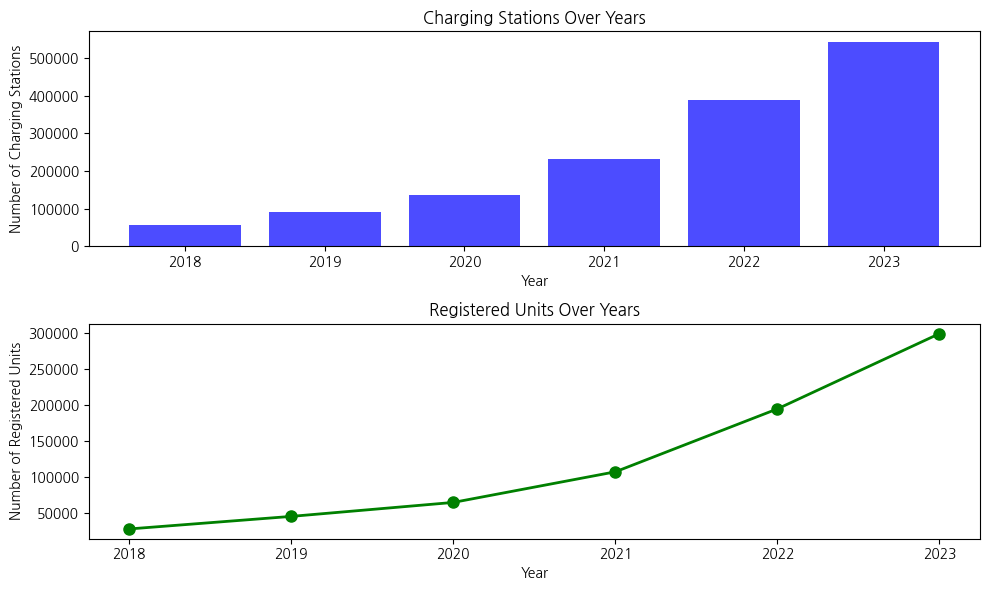

In [12]:
## 각각 그리기

# 막대그래프 그리기
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(seoul1.index, seoul1['총합'], color='blue', alpha=0.7)
plt.title('Charging Stations Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Charging Stations')

# 꺾은선 그래프 그리기
plt.subplot(2, 1, 2)
plt.plot(seoul2.index, seoul2['충전소'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
plt.title('Registered Units Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Registered Units')

plt.tight_layout()
plt.show()

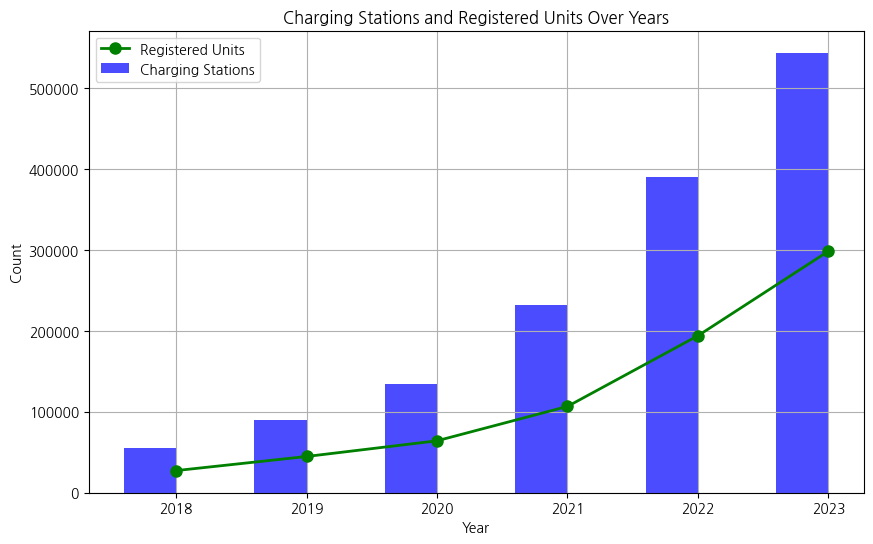

In [13]:
## 한번에 그리기

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 막대그래프 그리기
plt.bar(seoul1.index - 0.2, seoul1['총합'], width=0.4, label='Charging Stations', color='blue', alpha=0.7)

# 꺾은선 그래프 그리기
plt.plot(seoul2.index, seoul2['충전소'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8, label='Registered Units')

# 라벨 및 타이틀 설정
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Charging Stations and Registered Units Over Years')

# 범례 표시
plt.legend()

# 그리드 표시
plt.grid(True)

# 그래프 보이기
plt.show()

In [25]:
#3.0 연도별_충전방해_민원건수(18~23년)

conn=pymysql.connect(host='database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com',port=3306,user='root',password='42314231',db='project')
sql="select * from 연도별_충전방해_민원건수"


seoul3_tmp = pd.read_sql_query(sql,conn)


conn.close()
#charging_station=pd.read_csv("../data/charging_station.csv",encoding='cp949')

# #2.1

seoul3 = seoul3_tmp.astype(dtype={'년월':'int', '충전방해':'int'},
                        errors='raise',
                        copy=True)
# seoul3.info()


seoul3 =seoul3.set_index('년월')

seoul3

/tmp/ipykernel_34085/733424641.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  seoul3_tmp = pd.read_sql_query(sql,conn)


,충전방해
년월,
2023,279759
2022,81071
2021,9877
2020,6548
2019,4952
2018,349


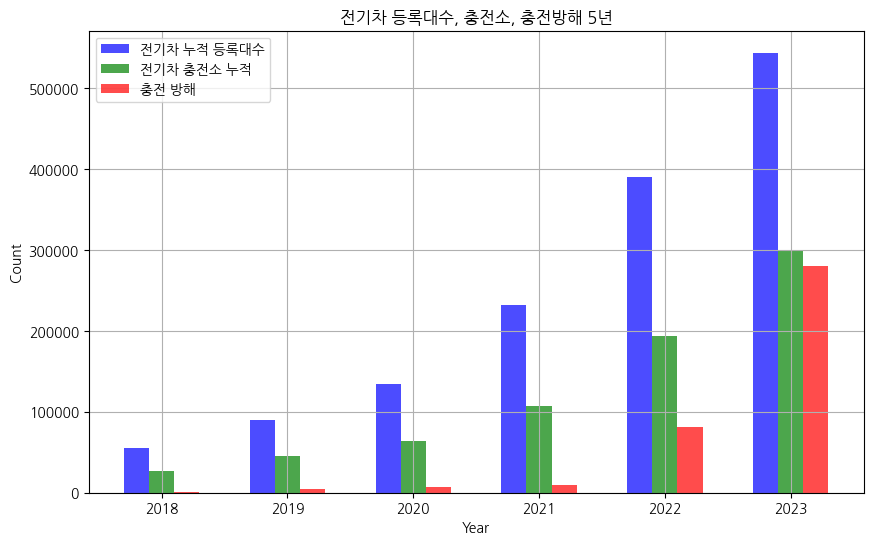

In [28]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

# 막대그래프 그리기
plt.bar(seoul1.index - 0.2, seoul1['총합'], width=0.2, label='전기차 누적 등록대수', color='blue', alpha=0.7)
plt.bar(seoul2.index, seoul2['충전소'], width=0.2, label='전기차 충전소 누적', color='green', alpha=0.7)
plt.bar(seoul3.index + 0.2, seoul3['충전방해'], width=0.2, label='충전 방해', color='red', alpha=0.7)

# 라벨 및 타이틀 설정
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('전기차 등록대수, 충전소, 충전방해 5년')

# 범례 표시
plt.legend()

# 그리드 표시
plt.grid(True)

# 그래프 보이기
plt.show()